# **Data Visualisation**

In [2]:
import pandas as pd

df = pd.read_csv("../Data/Cleaned/cleaned_data_set.csv")
df.head()  # View first 5 few rows

,Store,Type_x,Size_x,Type_y,Size_y,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,A,151315,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,A,151315,A,151315,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,A,151315,A,151315,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,A,151315,A,151315,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,A,151315,A,151315,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


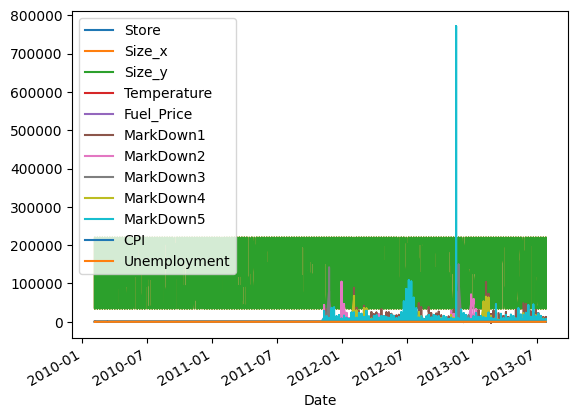

In [3]:
import matplotlib.pyplot as plt
# parse your dd/mm/YYYY dates correctly
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date').plot()
plt.show()

In [4]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format

In [5]:
summer_df = df[(df['Date'].dt.month >= 6) & (df['Date'].dt.month <= 8)]

In [6]:
pre_summer_df = df[df['Date'].dt.month == 5]  # May (before summer)
summer_prices = summer_df['Fuel_Price'].mean()  # Average fuel price in summer
pre_summer_prices = pre_summer_df['Fuel_Price'].mean()  # Average fuel price before summer

print(f"Average fuel price before summer: {pre_summer_prices}")
print(f"Average fuel price in summer: {summer_prices}")

Average fuel price before summer: 3.582707189542483
Average fuel price in summer: 3.4218939814814817


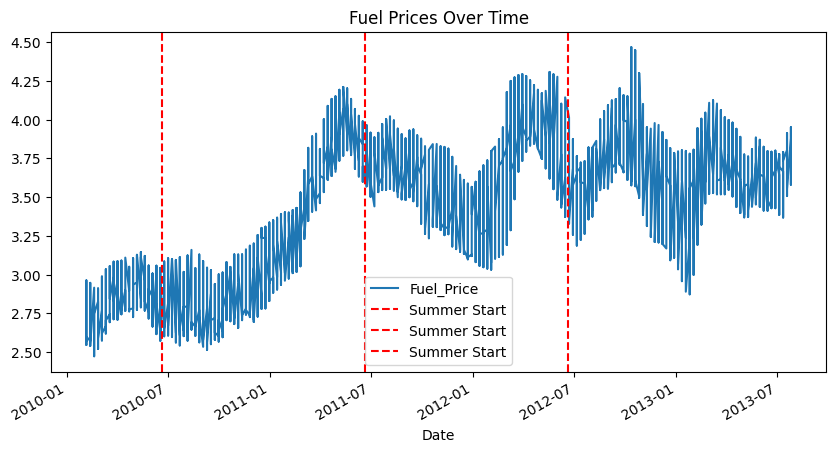

In [15]:
import matplotlib.pyplot as plt

df.set_index('Date')['Fuel_Price'].plot(figsize=(10,5), title="Fuel Prices Over Time")
plt.axvline(pd.to_datetime("2011-06-21"), color="red", linestyle="--", label="Summer Start")
plt.axvline(pd.to_datetime("2012-06-21"), color="red", linestyle="--", label="Summer Start")
plt.axvline(pd.to_datetime("2010-06-21"), color="red", linestyle="--", label="Summer Start")
plt.legend()
plt.show()

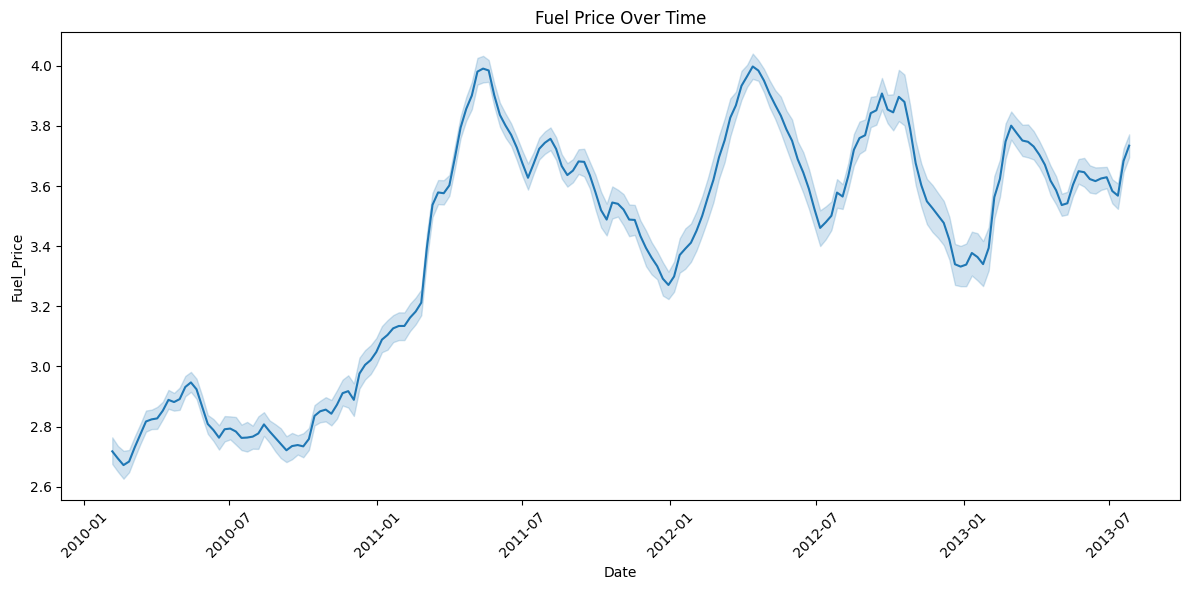

In [8]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Fuel_Price")
plt.xticks(rotation=45)
plt.title("Fuel Price Over Time")
plt.tight_layout()
plt.show()

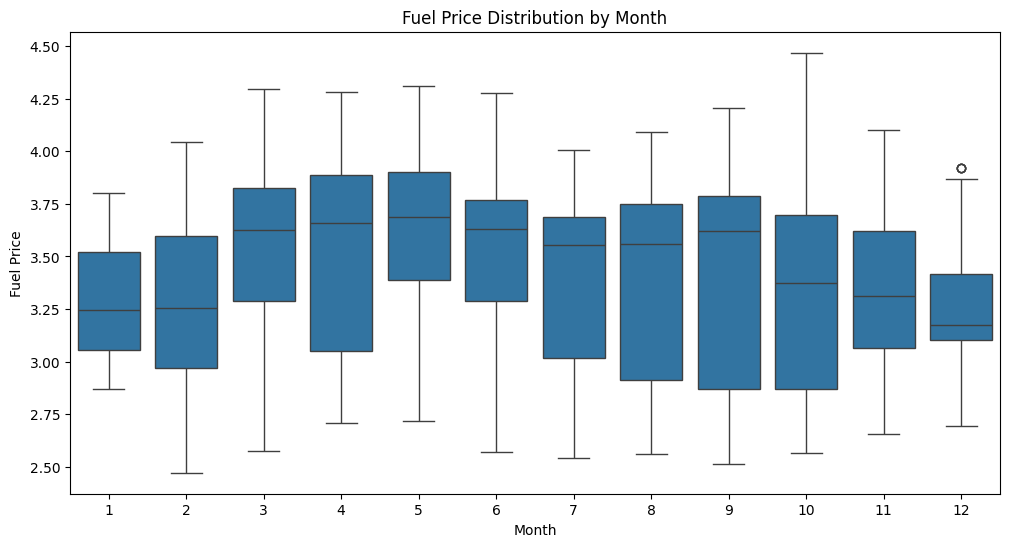

In [9]:
# Extract month from the Date column
df['Month'] = df['Date'].dt.month

# Plot fuel price distribution by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Fuel_Price')
plt.title('Fuel Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Fuel Price')
plt.show()

C:\Users\ajayc\AppData\Local\Temp\ipykernel_22776\4212368282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_per_store, x='Store', y='Fuel_Price', palette='viridis')


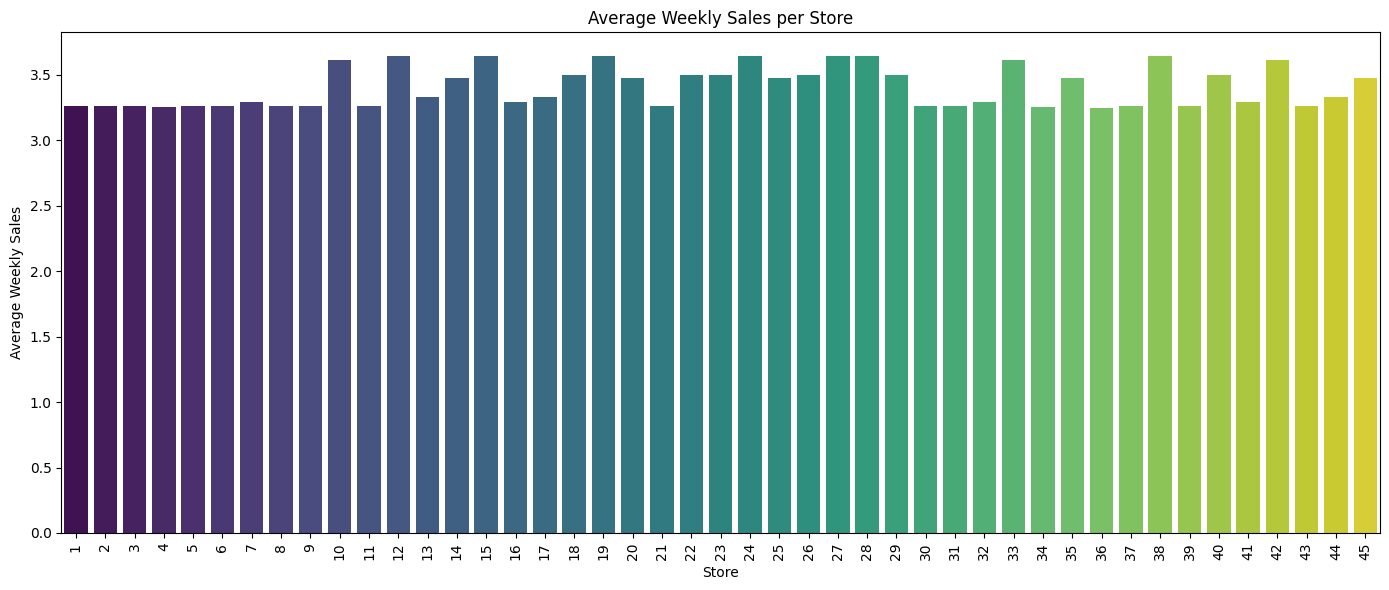

In [10]:
# Calculate average weekly sales per store and plot as a bar chart
avg_sales_per_store = df.groupby('Store')['Fuel_Price'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=avg_sales_per_store, x='Store', y='Fuel_Price', palette='viridis')
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

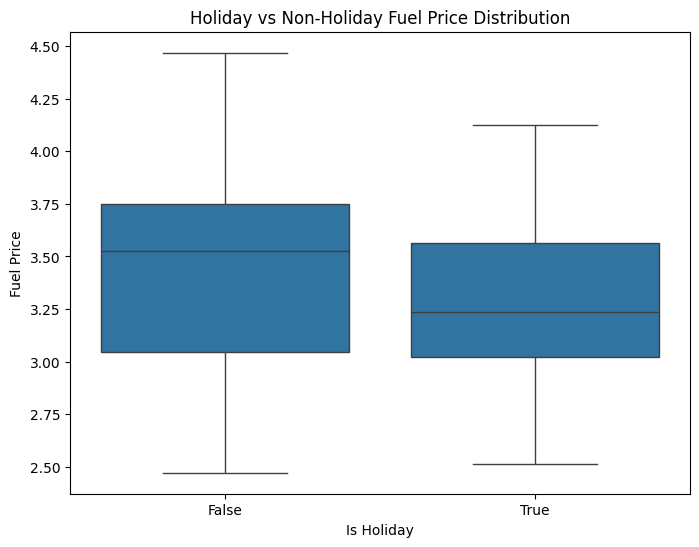

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='IsHoliday', y='Fuel_Price')
plt.title('Holiday vs Non-Holiday Fuel Price Distribution')
plt.xlabel('Is Holiday')
plt.ylabel('Fuel Price')
plt.show()

In [12]:
import pandas as pd

# ensure the dataframe 'df' exists (load it if not)
if 'df' not in globals():
    df = pd.read_csv("../Data/Cleaned/cleaned_data_set.csv")
    
import plotly.express as px

# compute total markdown per week
df['Total_Markdown'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)

# scatter plot: total markdown vs. Fuel price
fig = px.scatter(
    df,
    x='Fuel_Price',
    y='Total_Markdown',
    color='IsHoliday',
    title='Markdown Impact on Sales (Scatter Plot)',
    labels={
        'Total_Markdown': 'Total Markdown Spend',
        'Fuel Price': 'Fuel Price',
    }
)
fig.show()

In [13]:
df

,Store,Type_x,Size_x,Type_y,Size_y,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Total_Markdown
0,1,A,151315,A,151315,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2,0.00
1,1,A,151315,A,151315,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,2,0.00
2,1,A,151315,A,151315,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,2,0.00
3,1,A,151315,A,151315,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,2,0.00
4,1,A,151315,A,151315,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,3,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False,6,11439.98
8186,45,B,118221,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False,7,19254.20
8187,45,B,118221,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False,7,8598.17
8188,45,B,118221,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False,7,5635.21


In [14]:
# Checking the distribution of CPI (Consumer Price Index) by Store
fig = px.box(
    df,
    x='Store',
    y='CPI',
    title='CPI Distribution by Store',
    labels={'Store': 'Store', 'CPI': 'Consumer Price Index'}
)
fig.show()

In [16]:
import plotly.express as px
import pandas as pd

# Calculate median CPI per store to sort
store_order = df.groupby('Store')['CPI'].median().sort_values().index

# Create an enhanced box plot
fig = px.box(
    df,
    x='Store',
    y='CPI',
    title='CPI Distribution by Store (Sorted by Median)',
    labels={'Store': 'Store', 'CPI': 'Consumer Price Index'},
    category_orders={'Store': store_order},
    points='outliers',  # Show outliers
    template='plotly_white'  # Clean background
)

# Update layout for readability
fig.update_layout(
    xaxis_title='Store (Sorted by Median CPI)',
    yaxis_title='Consumer Price Index',
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    boxmode='group'
)

fig.show()
